In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
import numpy as np
import pandas as pd
import time
import math
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as skLDA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from scipy import stats
from numpy.linalg import norm, inv, det, cond

def normalize_data(X):
  scaler = StandardScaler()
  scaler.fit(X)
  return scaler.transform(X)

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url,sep = ",", header = None)
data.head()

data = data.to_numpy()
X,y = data[:, [x for x in range(data.shape[1]) if (x != 8) and x!=5]].astype(np.float32),data[:,-1]
G = len(np.unique(y))
le2 = LabelEncoder()
y = le2.fit_transform(y)
print(X.shape)
for g in range(G):
  print(sum(y==g))
X = normalize_data(X)
S = np.cov(X,rowvar = False)
print(cond(S))

(768, 7)
500
268
4.386725662676675


# Simulated data

In [ ]:
# PHF, DPER, Mice, MissForest, Soft-Impute
method = ['PHF','DPER','MICE','MF','SI']
missing_rate = ['20%','40%','60%','80%']
err_cov = np.array([[0.237, 0.237, 0.434, 0.347, 0.79],
       [0.263, 0.262, 0.752, 0.607, 1.180],
       [0.286, 0.285, 1.084, 0.892, 1.315],
       [0.314, 0.312, 1.358 , 1.124, 1.268]])

err_inv_cov = np.array([[0.252, 0.252, 0.4, 0.327, 0.502],
       [0.283, 0.282, 0.735, 0.496, 0.625],
       [0.315, 0.314, 1.358, 0.668, 0.659],
       [0.346, 0.344, 2.392, 0.791, 0.648]])


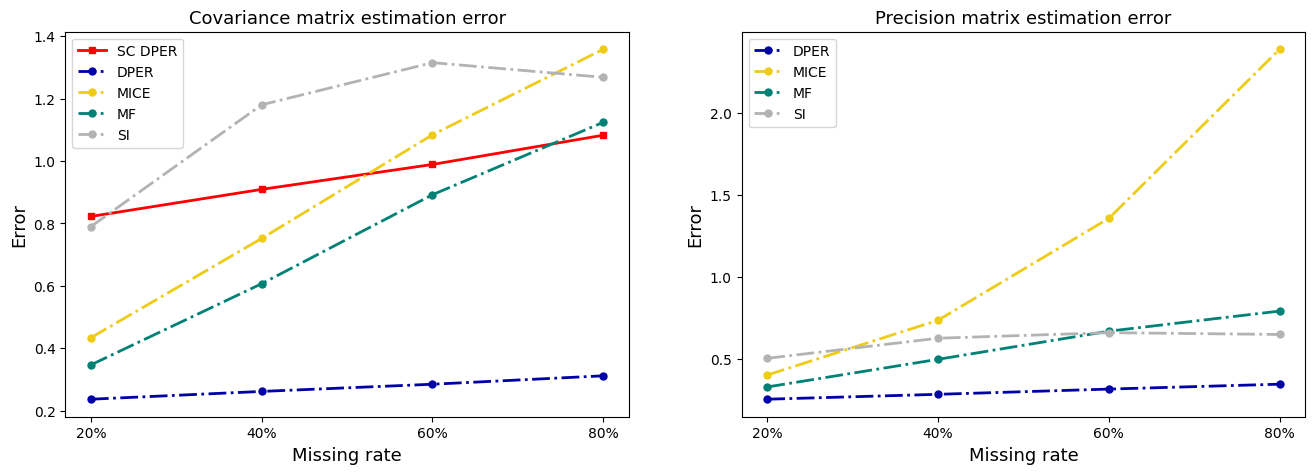

In [ ]:
missing_rate = ['20%','40%','60%','80%']
err_PHF = err_cov[:,0]
inv_err_PHF = err_inv_cov[:,0]
err_DPER = err_cov[:,1]
inv_err_DPER = err_inv_cov[:,1]
err_MICE = err_cov[:,2]
inv_err_MICE = err_inv_cov[:,2]
err_MF = err_cov[:,3]
inv_err_MF = err_inv_cov[:,3]
err_SI = err_cov[:,4]
inv_err_SI = err_inv_cov[:,4]
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(missing_rate, err_DPER*3.47,marker = 's', markersize = 5,
            linestyle = '-', linewidth = 2, color = "red",  label = 'SC DPER')
plt.plot(missing_rate, err_DPER,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#0000a7",  label = 'DPER')
plt.plot(missing_rate, err_MICE,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#eecc16",  label = 'MICE')
plt.plot(missing_rate, err_MF,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#008176",  label = 'MF')
plt.plot(missing_rate, err_SI,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#b3b3b3",  label = 'SI')
plt.ylabel('Error',fontsize = 13)
plt.xlabel('Missing rate',fontsize = 13)
plt.title('Covariance matrix estimation error',fontsize = 13)
plt.legend()


plt.subplot(122)
plt.plot(missing_rate, inv_err_DPER,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#0000a7",  label = 'DPER')
plt.plot(missing_rate, inv_err_MICE,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#eecc16",  label = 'MICE')
plt.plot(missing_rate, inv_err_MF,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#008176",  label = 'MF')
plt.plot(missing_rate, inv_err_SI,marker = 'o', markersize = 5,
            linestyle = '-.', linewidth = 2, color = "#b3b3b3",  label = 'SI')
plt.ylabel('Error',fontsize = 13)
plt.xlabel('Missing rate',fontsize = 13)
plt.title('Precision matrix estimation error',fontsize = 13)
plt.legend()

plt.show()